In [1]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In this homework, we will use the California Housing Prices from Kaggle.

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In [2]:
#Load the data
url="https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
df=pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

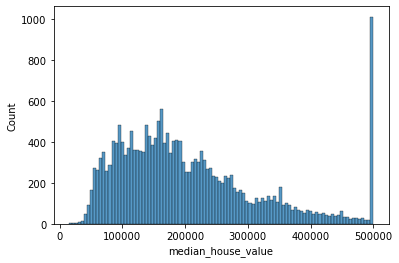

In [4]:
#Look at the median_house_value variable. Does it have a long tail? NO
sns.histplot(df['median_house_value'], bins=100)

In [ ]:
sns.distplot(df['median_house_value'], bins=100)

Features
For the rest of the homework, you'll need to use only these columns:

* 'latitude'
* 'longitude'
* 'housing_median_age'
* 'total_rooms'
* 'total_bedrooms'
* 'population'
* 'households'
* 'median_income'
* 'median_house_value'

Select only them.

In [5]:
df_selec = df[['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households',
               'median_income','median_house_value']]
print(df_selec.shape)
df_selec.head(5)

(20640, 9)


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


###  Question 1 : Find a feature with missing values. How many missing values does it have?
options 
* 207
* 307
* 408
* 508

In [6]:
df_selec.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2 : What's the median (50% percentile) for variable 'population'?
options
* 1133
* 1122
* 1166
* 1188

In [7]:
df_selec['population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

Split the data
* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [8]:
df_shuffled = df_selec.sample(frac=1, random_state=42)
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
n_val, n_test, n_train

(4128, 4128, 12384)

In [9]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
y_train_act = df_train['median_house_value'].values
y_val_act = df_val['median_house_value'].values
y_test_act = df_test['median_house_value'].values

y_train = np.log1p(y_train_act)
y_val = np.log1p(y_val_act)
y_test = np.log1p(y_test_act)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [11]:
df_train.shape, y_train.shape, df_val.shape, y_val.shape, df_test.shape, y_test.shape

((12384, 8), (12384,), (4128, 8), (4128,), (4128, 8), (4128,))

### Question 3 : 
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

Options:

* With 0
* With mean
* Both are equally good

In [12]:
# Utility Functions 

def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)


### With 0

In [13]:
X_null_train = prepare_X(df_train, fillna_value=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

X_null_val = prepare_X(df_val, fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

np.round(rmse(y_val, y_null_pred_val),2)

0.33

### With Mean

In [14]:
mean = df_train['total_bedrooms'].mean()

X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

np.round(rmse(y_val, y_mean_pred_val),2)

0.33

### Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
* If there are multiple options, select the smallest r.

Options:

* 0
* 0.000001
* 0.001
* 0.0001

In [15]:
#utility function
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [16]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(r, w_0, rmse_val)

0 -11.686975241794805 0.33
1e-06 -11.686959176076808 0.33
0.0001 -11.685368865520816 0.33
0.001 -11.670931318268877 0.33
0.01 -11.528493585897571 0.33
0.1 -10.274500282219261 0.33
1 -4.920480897768501 0.33
5 -1.482095745660724 0.34
10 -0.7899311831814243 0.34


### Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))
* Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

Options:

* 0.16
* 0.00005
* 0.005
* 0.15555

In [17]:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = df_selec.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_act = df_train['median_house_value'].values
    y_val_act = df_val['median_house_value'].values
    y_test_act = df_test['median_house_value'].values

    y_train = np.log1p(y_train_act)
    y_val = np.log1p(y_val_act)
    y_test = np.log1p(y_test_act)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

print('********************************')
print(rmse_list)

0 -11.900382138327194 0.34
1 -11.732757373349402 0.34
2 -11.806729360906544 0.33
3 -11.587900347727029 0.34
4 -11.389470588476469 0.34
5 -11.44711427614216 0.34
6 -11.370516351599953 0.35
7 -12.473448918335727 0.34
8 -11.800287429188433 0.35
9 -11.459046830555645 0.34
********************************
[0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.34, 0.35, 0.34]


In [18]:
np.round(np.std(rmse_list),3)

0.005

### Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

Options:

* 0.35
* 0.135
* 0.450
* 0.245

In [19]:
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = df_selec.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_act = df_train_val['median_house_value'].values
y_test_act = df_test['median_house_value'].values

y_train_val = np.log1p(y_train_val_act)
y_test = np.log1p(y_test_act)

del df_train_val['median_house_value']
del df_test['median_house_value']

In [20]:
X_null_train_val = prepare_X(df_train_val, fillna_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

0.35